# 분류문제: 
- LMS에서의 학습태도를 이용한 학생 성적등급 예측
- y값: Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)


    

### [문제1] 아래의 사이트를 참조하여 각 필드 설명

- 데이터셋: https://www.kaggle.com/aljarah/xAPI-Edu-Data
- [문제1-1] 아래의 변수 간략히 설명
     - gender: 
    - NationaliTy: 
    - PlaceofBirth: 
    - StageID: 
    - GradeID: 
    - SectionID: 
    - Topic: 
    - Semester:
    - Relation: 
    - raisedhands: 
    - VisITedResources: 
    - Discussion: 
    - ParentAnsweringSurvey: 
    - ParentschoolSatisfaction: 
    - StudentAbscenceDays: 
    - Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)      
    
- [문제1-2] xAPI-Edu-Data 데이터의 전반적 설명



## [문제2] 데이터셋 준비 및 기초통계분석


### [문제2-1] 판다스에서  read_csv 로 한글 읽을때 발생하는 encoding에 대하여 정리


In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('xAPI-Edu-Data.csv')

In [425]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [427]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### [문제2-2] df 자료의 무작위 번호 10개 출력(480개의 행중 무작위로 10개 데이터 출력)
- 방법1) 판다스의 샘플 데이터 출력 이용
- 방법2) 직접 rand함수를 이용하여 샘플 번호 출력

In [428]:
### 문제2-2의 방법1
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [429]:
### 문제2-2의 방법2
a = np.random.randint(0, 480, size = 10)
b = sorted(a)
df2 = df.loc[b,:]
df2



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
45,M,KW,KuwaIT,MiddleSchool,G-07,A,Quran,F,Father,20,12,15,70,No,Good,Above-7,L
84,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,50,70,50,10,Yes,Good,Above-7,H
264,F,Jordan,Jordan,MiddleSchool,G-06,A,English,F,Mum,70,64,42,32,No,Bad,Under-7,M
299,M,Jordan,Jordan,lowerlevel,G-04,A,Science,S,Father,32,14,32,29,No,Good,Above-7,M
299,M,Jordan,Jordan,lowerlevel,G-04,A,Science,S,Father,32,14,32,29,No,Good,Above-7,M
311,M,Jordan,Jordan,lowerlevel,G-04,B,Science,S,Father,42,34,29,39,No,Good,Above-7,M
332,F,Jordan,Jordan,lowerlevel,G-02,A,French,F,Mum,10,90,30,21,No,Good,Under-7,M
343,M,Jordan,Jordan,lowerlevel,G-02,B,French,S,Mum,35,92,29,33,No,Bad,Under-7,M
415,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,S,Mum,9,7,9,3,No,Good,Above-7,L
420,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,82,89,22,31,Yes,Good,Under-7,H


### [문제2-3] df.info 의 type의 이해

- [문제2-3-1] df의 타입중  object형만 출력
    - 구글검색해서 해보세요..
    - 출력결과는 gender, nationallTy, PlaceofBirth, StageId 등 object형의  컬럼명만 출력되면 됨
- [문제2-3-3] 판다스의 type중  object와 category 의 차이점에 대하여 조사


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [431]:
##  [문제2-3-1] df의 타입중  object형만 출력
tmp_list=[]
for i in df.columns:
    if df[i].dtypes == 'O':
        tmp_list.append(i)
df3 = df[tmp_list]
df3

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


In [432]:
## [문제2-3-3] 판다스의 type중  object와 category 의 차이점에 대하여 조사

#값의 종류가 제한적일 때는 category 를 사용하고
#일반 적인 문자열을 갖는 칼럼은 objecr로 사용한다.

In [433]:
df3.describe()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


### [문제2-4] object형의 데이터 카운트 및 비율 확인
- 카운트와 %를 출력 (gender' / 'NationallTy' 등 object 형만 작업) 
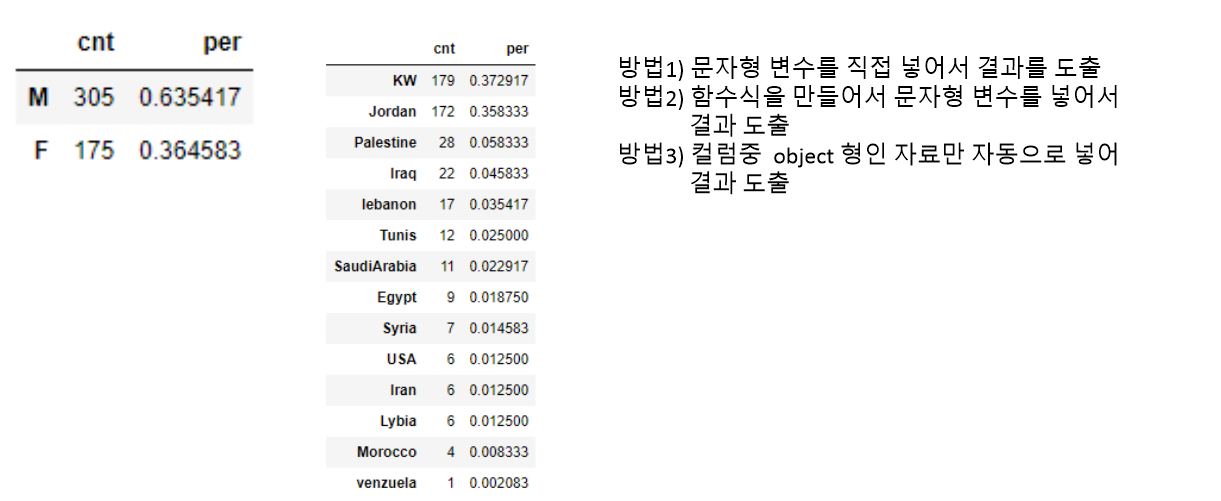

In [434]:
tmp = df3.columns


tmp = df[i].value_counts()
data = {
        'cnt' : tmp,
        'per' : tmp/480
    }
tmp_df = pd.DataFrame(data)
tmp_df

df3.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [435]:
#NationalITy

# def trans(i):
#     tmp = df[i].value_counts()
#     data = {
#         'cnt' : tmp,
#         'per' : tmp/480
#     }
#     tmp_df = pd.DataFrame(data)
#     return tmp_df


# tmp = df3.columns
# for j in tmp:
#     trans(j)

## [문제3] 수치형 자료 히스토그램 그리기
- # seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

In [436]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='raisedhands', ylabel='Count'>

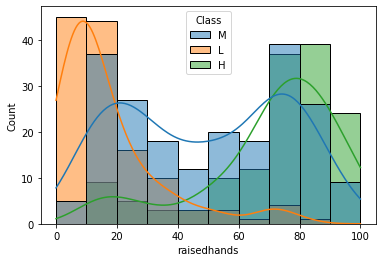

In [437]:


sns.histplot(x='raisedhands', data=df, hue='Class', kde=True)
# 아래의 출력결과물을 제작하고 출력결과를 해석

<AxesSubplot:xlabel='VisITedResources', ylabel='Count'>

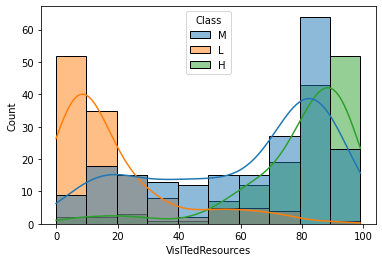

In [438]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.histplot(x='VisITedResources', data=df, hue='Class', kde=True)

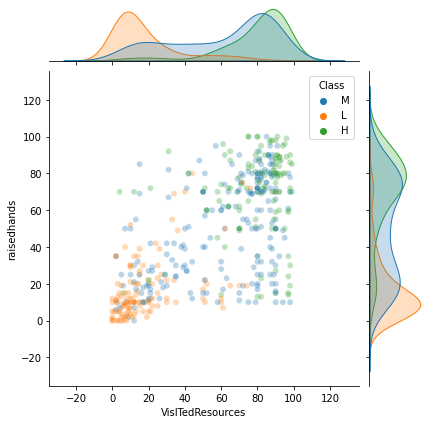

In [439]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.jointplot(x='VisITedResources', y='raisedhands', hue='Class', data=df, alpha=0.3)

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Count'>

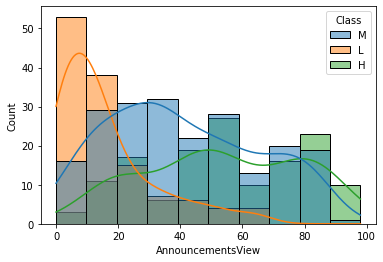

In [440]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.histplot(x='AnnouncementsView', data=df, hue='Class', kde=True)


<AxesSubplot:xlabel='Discussion', ylabel='Count'>

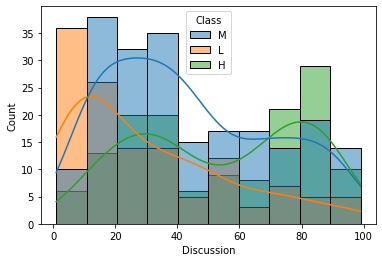

In [441]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

sns.histplot(x='Discussion', data=df, hue='Class', kde=True)

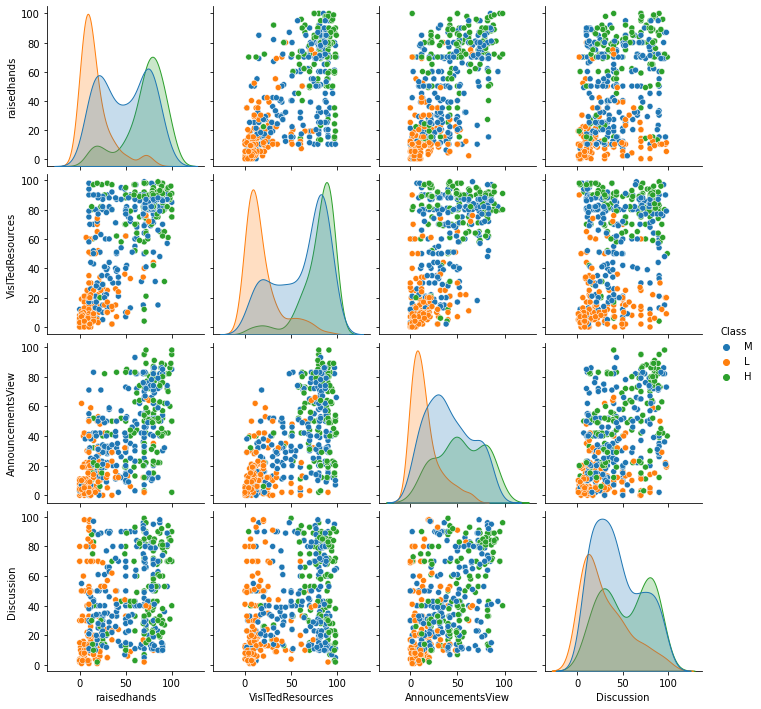

In [442]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

g = sns.pairplot(df, hue="Class")

### 문제4) Y값의  Class 컬럼을 수치로 바꾸어 표현하기

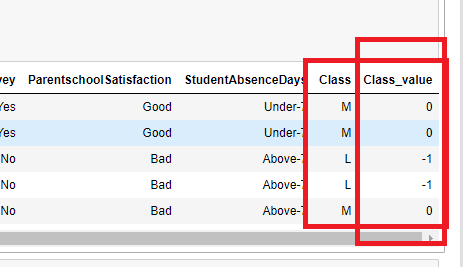

In [443]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용
# 파이썬 Map함수를 이용하여 작업

conv_dict = {'L':-1,'M':0,'H':1}
Class_value = df['Class'].map(conv_dict)

df4 = pd.DataFrame({'Class_value':Class_value})
df5 = pd.concat([df,df4], axis = 1)

df5



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L,-1
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M,0
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M,0
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L,-1


<BarContainer object of 2 artists>

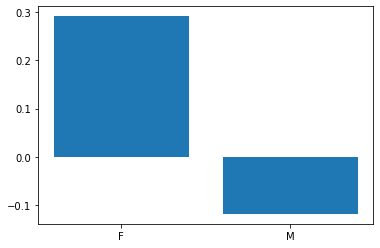

In [289]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

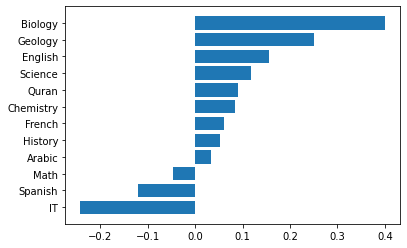

In [307]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석
gb2 = df.groupby('Topic').mean()['Class_value'].sort_values()

plt.barh(gb2.index, gb2)



<BarContainer object of 2 artists>

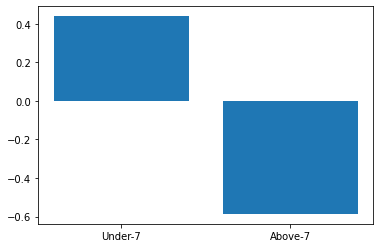

In [319]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석

gb3 = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending=False)


plt.bar(gb3.index, gb3)


## 문제5. 모델 학습을 위한 데이터 전처리


### [문제5-1]  get_dummies()를 이용하여 범주형 데이터 전처리하기


In [446]:
df5.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [465]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# ['ParentschoolSatisfaction', 'Class', 'Class_value'] 는 drop하여서 변수에서 제외
#X, y데이터 분리함

tmp = ['ParentschoolSatisfaction', 'Class', 'Class_value']

ddf = df5.drop(columns=tmp)
a = pd.get_dummies(ddf)
a


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0


### [문제5-2]  학습데이터와 테스트데이터 분리하기
- X_train, X_test, y_train, y_test 데이터셋 제작
- 테스트사이즈 0.3으로 분리/  같은 데이터셋을 추출할수 있도록  random번호 지정


In [383]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report

In [506]:
X = a
y = df5['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## [문제6]. Classification 모델 학습하기


### [문제6-1]. Logistic Regression 모델 생성/학습하기
- max_iter 옵션값 조정을 통해 학습성능 높이기

In [507]:
from sklearn.linear_model import LogisticRegression

In [508]:
model_lr = LogisticRegression(max_iter=15000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [509]:
y_predict = model_lr.predict(X_test)

print('---테스트-예측값--- ')
print(y_predict)  # 
print('\n--테스트-실제값--- ')
print(y_test)  # 
print('\n--테스트데이터 정확도--- ')
print(accuracy_score(y_test, y_predict)) #1.0 #정확도

---테스트-예측값--- 
['H' 'H' 'L' 'L' 'M' 'M' 'H' 'L' 'M' 'L' 'M' 'M' 'H' 'M' 'H' 'H' 'L' 'L'
 'H' 'L' 'M' 'M' 'M' 'M' 'H' 'H' 'M' 'M' 'L' 'H' 'H' 'H' 'H' 'M' 'H' 'M'
 'M' 'M' 'M' 'L' 'H' 'M' 'M' 'L' 'M' 'L' 'M' 'H' 'L' 'M' 'M' 'M' 'L' 'M'
 'H' 'H' 'L' 'M' 'H' 'M' 'M' 'H' 'L' 'M' 'M' 'H' 'M' 'H' 'M' 'H' 'M' 'M'
 'H' 'L' 'L' 'H' 'H' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'H' 'L' 'M' 'M' 'H' 'M'
 'M' 'H' 'H' 'M' 'M' 'M' 'L' 'L' 'M' 'L' 'H' 'M' 'H' 'M' 'M' 'H' 'L' 'H'
 'M' 'H' 'L' 'M' 'H' 'H' 'M' 'H' 'M' 'L' 'H' 'H' 'M' 'L' 'L' 'L' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'H' 'L' 'M' 'M' 'L' 'H' 'H' 'H' 'M' 'L' 'L' 'M' 'H']

--테스트-실제값--- 
293    H
283    H
34     L
380    L
430    H
      ..
122    M
23     L
13     L
61     M
287    H
Name: Class, Length: 144, dtype: object

--테스트데이터 정확도--- 
0.7083333333333334


In [510]:



print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.82      0.81        33
           M       0.61      0.68      0.64        56

    accuracy                           0.71       144
   macro avg       0.73      0.72      0.72       144
weighted avg       0.71      0.71      0.71       144



### 참고. Logistic Regression 모델 계수로 상관성 파악하기

In [511]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [512]:
model_lr.coef_.shape

(3, 70)

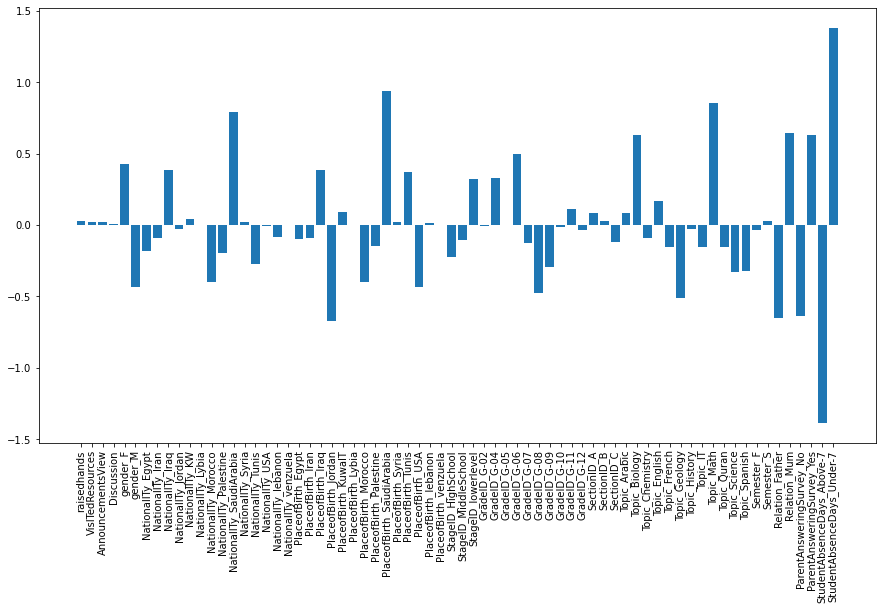

In [513]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[0, :])
plt.xticks(rotation=90)
plt.show()

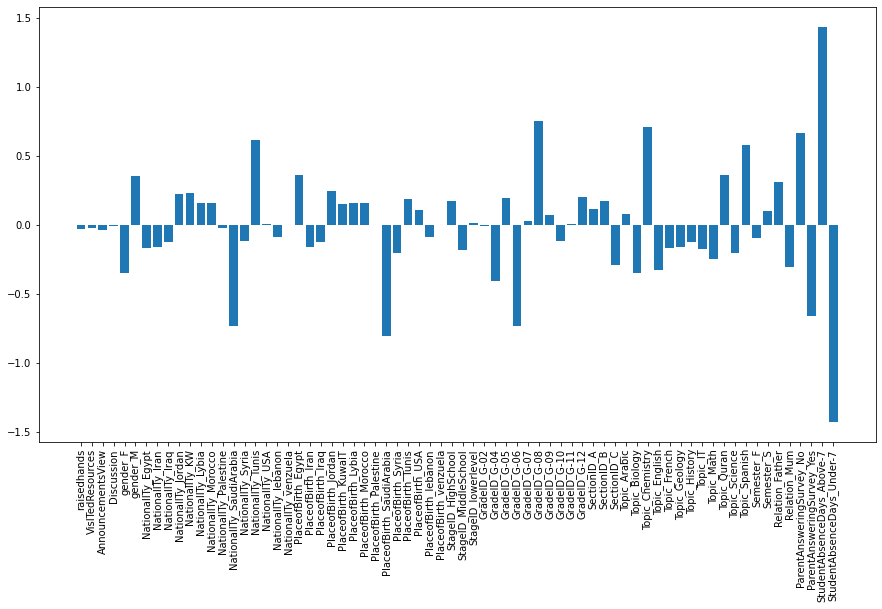

In [514]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[1, :])
plt.xticks(rotation=90)
plt.show()

## [문제]. 의사결정트리 또는 랜덤 포레스트 모델로 학습하기

In [515]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [516]:
import warnings
warnings.filterwarnings('ignore')

In [517]:
df = pd.read_csv('xAPI-Edu-Data.csv')
df.shape

(480, 17)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [519]:
X = a
y = df5['Class_value']

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [521]:
X_train.shape, X_test.shape

((336, 70), (144, 70))

In [522]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [523]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [524]:
from sklearn.metrics import accuracy_score

In [525]:
accuracy_score(y_test, y_pred)

0.7638888888888888